In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

### Datatable

In [2]:
from itables import show

df = pd.read_excel('./data/demo.xlsx')

show(df)


x,y


Text(0, 0.5, 'y')

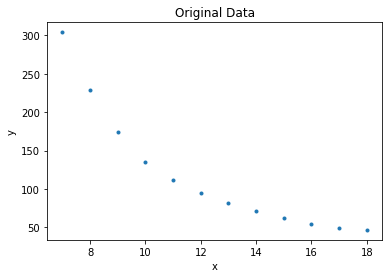

In [3]:
plt.plot(df['x'], df['y'], '.')

plt.title("Original Data")
plt.xlabel('x')
plt.ylabel('y')


### Adding calculated column

#### Simple equation
$ x_{2} = \frac {(x^2 + 1)}{2} $

Text(0, 0.5, 'y')

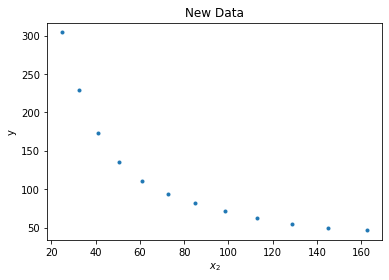

In [4]:
df['x2'] = (df['x']**2 + 1) / 2
plt.plot(df['x2'], df['y'], '.')

plt.title("New Data")
plt.xlabel('$x_2$')
plt.ylabel('y')

### Getting sum

In [5]:
sum_x = df['x'].sum()
sum_x

150

### Mean value

In [6]:
mean_x = df['x'].mean()
mean_x


12.5

### Filtering


In [7]:
x_above_mean = df[df['x'] > mean_x]
x_above_mean


,x,y,x2


### Curve fitting
#### Least squares polynomial fit.

In [8]:
def get_r2(y, y2):
    squaredDiffs = np.square(y - y2)
    squaredDiffsFromMean = np.square(y - y.mean())
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)

    return rSquared


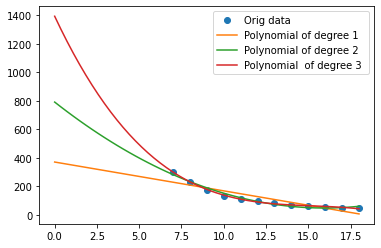

In [9]:
import numpy.polynomial.polynomial as poly

new_x = np.linspace(0, df['x'].max())

y_fit_1_coefficients = poly.polyfit(df['x'], df['y'], 1)
y_fit_1 = poly.polyval(new_x, y_fit_1_coefficients)

y_fit_2_coefficients = poly.polyfit(df['x'], df['y'], 2)
y_fit_2 = poly.polyval(new_x, y_fit_2_coefficients)

y_fit_3_coefficients = poly.polyfit(df['x'], df['y'], 3)
y_fit_3 = poly.polyval(new_x, y_fit_3_coefficients)

plt.plot(df['x'], df['y'], 'o', label='Orig data')
plt.plot(new_x, y_fit_1, '-', label='Polynomial of degree 1')
plt.plot(new_x,  y_fit_2, '-', label='Polynomial of degree 2')
plt.plot(new_x,  y_fit_3, '-', label='Polynomial  of degree 3 ')
plt.legend()


### Curve fitting
#### Using function


Text(0, 0.5, 'y')

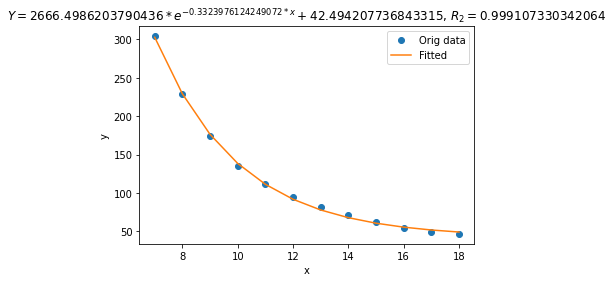

In [10]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

p0 = (2000, .1, 50) # set initial values for the parameters
params, cv = scipy.optimize.curve_fit(monoExp, df['x'], df['y'], p0)
m, t, b = params

fitted_values = monoExp(df['x'], m, t, b)

plt.plot(df['x'], df['y'], 'o', label='Orig data')
plt.plot(df['x'], fitted_values, '-', label='Fitted')
plt.legend()
plt.title(f"$Y = {m} * e^{{-{t} * x}} + {b}$, $R_2 = " + str(get_r2(df['y'], fitted_values)) +"$")
plt.xlabel('x')
plt.ylabel('y')


### Correlation



In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,x,y,x2
x,1.000000,-0.904741,0.992616
y,-0.904741,1.000000,-0.849737
x2,0.992616,-0.849737,1.000000


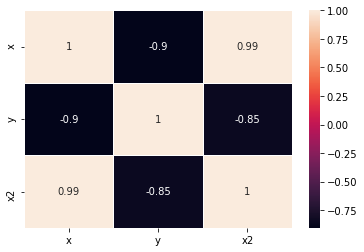

In [12]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(corr, linewidth=0.5, annot=True)
plt.show()